In [11]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 

# TO Avoid this :: 'failed to get convolution algorithm. This is probably because cuDNN failed to initialize'
# Run the following 
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [12]:
tf.__version__

'2.2.0'

In [8]:
def buildCNNModel():

    classifier = Sequential()
    # Convolution Layer 1 with 32 filters of size = (3,3) and activation function : relu 
    classifier.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation='relu'))
    # Pooling layer 
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Conv2D(64,(3,3),activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Conv2D(32,(3,3),activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Flatten())

    classifier.add(Dense(500,activation='relu'))
    classifier.add(Dense(3,activation='softmax'))

    classifier.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    return classifier



In [69]:
train_data_gen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)

train_set = train_data_gen.flow_from_directory('dataset/',target_size=(64,64),batch_size=32,class_mode='sparse')
test_set = test_data_gen.flow_from_directory('dataset/',target_size=(64,64),batch_size=32,class_mode='sparse')

train_set.class_indices

Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


{'cat': 0, 'dog': 1, 'monkey': 2}

In [10]:
classifier = buildCNNModel()

In [13]:
#with tf.device('/physical_device:GPU:0'):
classifier.fit(train_set,steps_per_epoch=2000,epochs=30,validation_data=test_set,validation_steps=100)

Epoch 1/30
2000/2000 [==============================] - 440s 220ms/step - loss: 0.0121 - accuracy: 0.9975 - val_loss: 3.9305e-05 - val_accuracy: 1.0000
Epoch 2/30
2000/2000 [==============================] - 438s 219ms/step - loss: 3.8760e-05 - accuracy: 1.0000 - val_loss: 5.0822e-07 - val_accuracy: 1.0000
Epoch 3/30
2000/2000 [==============================] - 441s 220ms/step - loss: 3.2712e-06 - accuracy: 1.0000 - val_loss: 1.1392e-07 - val_accuracy: 1.0000
Epoch 4/30
2000/2000 [==============================] - 440s 220ms/step - loss: 1.4535e-06 - accuracy: 1.0000 - val_loss: 1.4909e-06 - val_accuracy: 1.0000
Epoch 5/30
2000/2000 [==============================] - 442s 221ms/step - loss: 3.3261e-07 - accuracy: 1.0000 - val_loss: 2.4676e-08 - val_accuracy: 1.0000
Epoch 6/30
2000/2000 [==============================] - 441s 220ms/step - loss: 1.3500e-07 - accuracy: 1.0000 - val_loss: 3.6955e-09 - val_accuracy: 1.0000
Epoch 7/30
2000/2000 [==============================] - 440s 220ms/s

In [2]:
########## Save Trained model 
#classifier.save('cat_dog_monkey.h5')

In [22]:
######## LOAD Trained Model Here 
classifier = load_model('cat_dog_monkey.h5')

In [23]:
def predict(ip):
    result = None 
    # Now we can read the test image 
    test_image=image.load_img(ip,target_size=(64,64))
    plt.imshow(test_image)
    # Now we have to convert the image into array 
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis=0)

    #print(test_image.shape)
    # Now we can give the image to our classifier for prediction 
    result = classifier.predict(test_image)
    print(result)
    if result[0][0] > 0.9:
        return('Cat')
    elif result[0][1] > 0.9:
        return('Dog')
    elif result[0][2] > 0.9:
        return('Monkey')
    else:
        return(None)

[[0. 0. 1.]]


'Monkey'

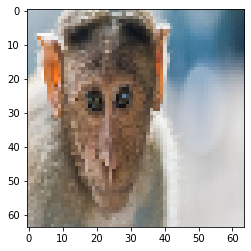

In [24]:
predict('test/mokey.jpg')

[[1. 0. 0.]]


'Cat'

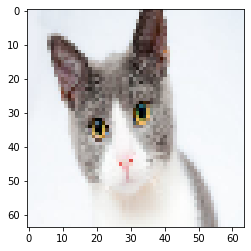

In [25]:
predict('test/cat.jpeg')

[[0. 0. 1.]]


'Monkey'

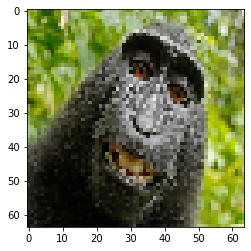

In [26]:
predict('test/monkey2.jpg')

[[0. 0. 1.]]


'Monkey'

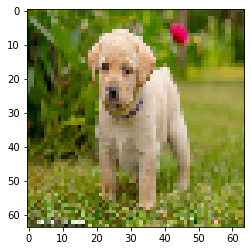

In [27]:
predict('test/dog2.jpg')

[[0. 1. 0.]]


'Dog'

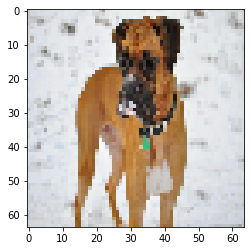

In [28]:
predict('test/dog3.jpg')

[[0. 1. 0.]]


'Dog'

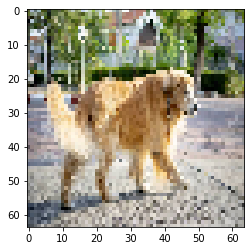

In [29]:
predict('test/dog4.jpg')

[[0. 1. 0.]]


'Dog'

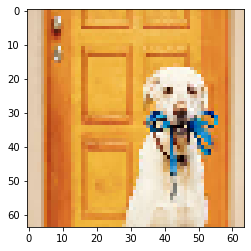

In [30]:
predict('test/dogg.jpeg')